###### Pandas ###
• Easy handling for missing data (represented as NaN) in ﬂoating point as well as non-ﬂoating point data <br>
• Size mutability: columns can be inserted and deleted from DataFrame and higher dimensional objects <br>
• Automatic and explicit data alignment: objects can be explicitly aligned to a set of labels, or the user can simply ignore the labels and let Series, DataFrame, etc. automatically align the data for you in computations <br>
• Powerful, ﬂexible group by functionality to perform split-apply-combine operations on data sets, for both aggregating and transforming data <br>
• Make it easy to convert ragged, differently-indexed data in other Python and NumPy data structures into DataFrame objects <br>
• Intelligent label-basedslicing,fancyindexing, andsubsettingof large data sets <br>
• Intuitive merging and joining data sets <br>
• Flexible reshaping and pivoting of data sets<br>
• Hierarchical labeling of axes (possible to have multiple labels per tick) <br>
• Robust IO tools for loading data from ﬂat ﬁles(CSVanddelimited),Excelﬁles,databases,andsaving/loading data from the ultra fast HDF5format <br>
• Time series-speciﬁc functionality: date range generation and frequency conversion, moving window statistics, moving window linear regressions, date shifting and lagging, etc. <br>

Reference:

In Chinese (with ad) https://www.pypandas.cn/docs/user_guide/

In English (No ad)  https://pandas.pydata.org/docs/reference/index.html

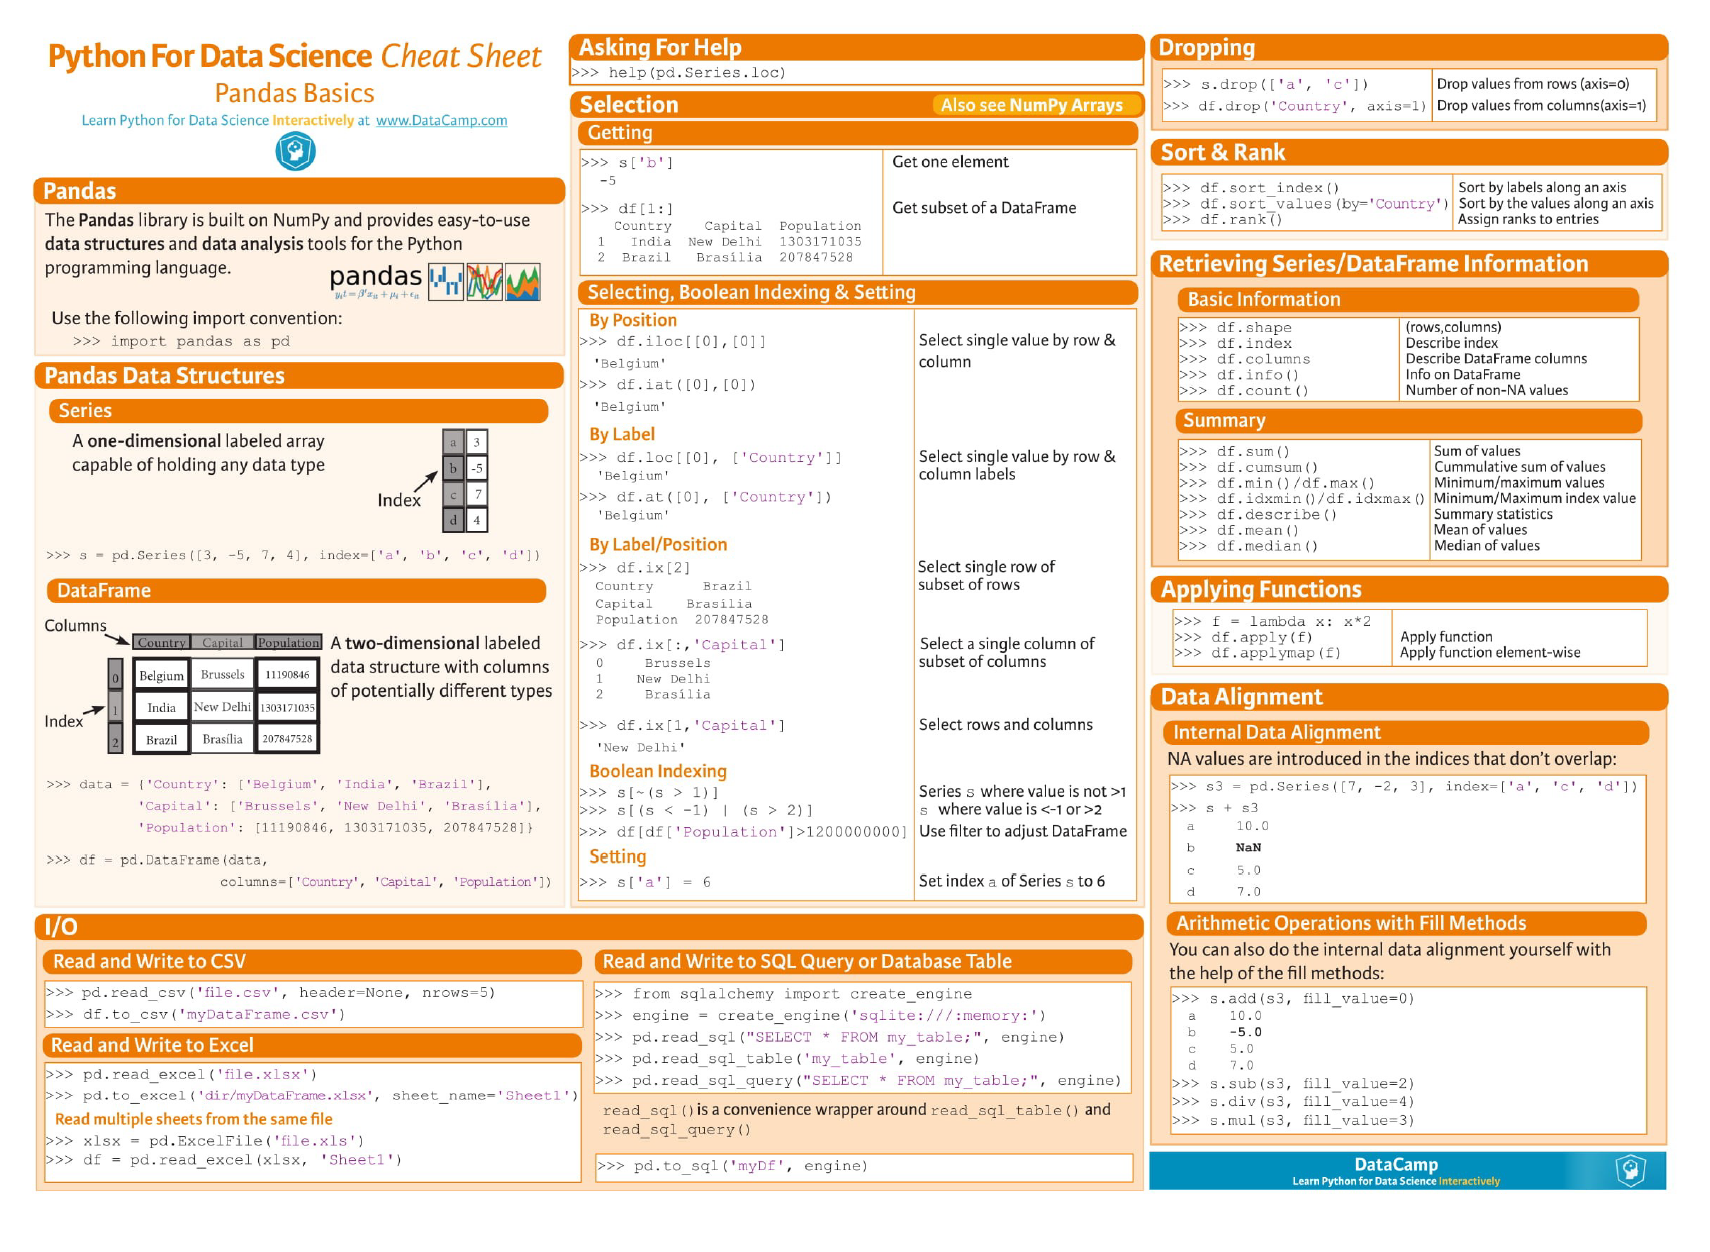

In [ ]:
import numpy as np
import pandas as pd

Creating a *Series* by passing a list of values, letting pandas create a default integer index:

In [ ]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

In [ ]:
s.head(2)

Creating a *DataFrame* by passing a NumPy array, with a datetime index using *date_range()* and labeled columns:

In [ ]:
dates = pd.date_range("20220101", periods=6)
dates

In [ ]:
list("ABCD")

In [ ]:
df = pd.DataFrame(np.random.randn(6,4), columns=list("ABCD"))
df
df["A"]

In [ ]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list("ABCD"))
df
df[["A","B"]]
df["A","B"]

Creating a *DataFrame* by passing a dictionary of objects that can be converted into a series-like structure:

In [ ]:
pd.Timestamp("20220102")

In [ ]:
df2 = pd.DataFrame(    
      {"A": 0.1,
       "B": pd.Timestamp("20220102"),
       "C": pd.Series(1, index=list(range(4)), dtype="float32"),
       "D": np.array([3] * 4, dtype="int32"),
       "E": pd.Categorical(["test", "train", "test", "train"]),
       "F": "foo",
    }
)
df2

In [ ]:
df2.dtypes # The columns of the resulting DataFrame have different dtypes

Viewing data

In [ ]:
df

In [ ]:
#df = pd.DataFrame(np.random.rand(6,4),index=dates,columns=list(range(4)))
print(df.head())
print(df.head(2))

In [ ]:
print(df.tail())
print(df.tail(4))

In [ ]:
df.index #get index

In [ ]:
df.columns # columns name

*DataFrame.to_numpy()* gives a NumPy representation of the underlying data. NumPy arrays have one dtype for the entire array, while pandas DataFrames have one dtype per column. When you call *DataFrame.to_numpy()*, pandas will find the NumPy dtype that can hold all of the dtypes in the DataFrame. 

In [ ]:
df_Np = df.to_numpy()
print(df_Np)
df_Np[0,0] = 100
df

In [ ]:
df2.to_numpy()

*describe()* shows a quick statistic summary of your data

In [ ]:
df.describe()

In [ ]:
# Transposing data
df.T

In [ ]:
df

In [ ]:
df.sort_index(axis=0, ascending=False)

In [ ]:
df

In [ ]:
df.sort_index(axis=1, ascending=False)

## Selection

In [ ]:
df.head(2)

In [ ]:
df.columns = ['A', 'B', 'C', 'DD']
df.head(3)

In [ ]:
df.A

In [ ]:
df['A']

In [ ]:
df[0:3]

In [ ]:
print(df)
df["20220103":"20220106"]

Selection by label

In [ ]:
print(df)
print(dates[0])
df.loc[dates[0]]

In [ ]:
df.loc[:, ["A", "B"]]

In [ ]:
df.loc["20220102":"20220104", ["A", "B"]]

Selection by position

In [ ]:
print(df)
df.iloc[3] #integer

In [ ]:
df.iloc[3:5, 0:2]

In [ ]:
#By lists of integer position locations, similar to the NumPy/Python style
df.iloc[[1, 2, 4], [0, 2]]

In [ ]:
#slicing rows
df.iloc[1:3,:]
df.iloc[1:3,]

In [ ]:
df.iloc[:, 1:3]#slicing columns
df.iloc[,1:3]#slicing columns

In [ ]:
df.iloc[1, 1]#getting a value

Boolean indexing

In [ ]:
# using a single column’s values to select data
print(df)
print(df["A"] > 0)
df[df["A"] > 0]
df.loc[df["A"] > 0]

In [ ]:
print(df["A"] > 0)
dff = df.sort_index(axis=0, ascending=False)
print(dff.head(4))
dff[df["A"] > 0]

In [ ]:
#selecting values from a DataFrame where a boolean condition is met
print(df>0)
df[df > 0]

In [ ]:
print(df)
df1 = df
df1.iloc[1,1] = 1000
print(id(df),id(df1))

In [ ]:
df3 = df.copy()
df3.iloc[1,1] = 0.00001
df

In [ ]:
df4 = pd.DataFrame(df)
df4.iloc[0,0]= 20000
print(df4)
print(id(df),id(df4))
df

### concatenation ###
adding vertically, append rows to the end of data frame

In [ ]:
df1.index=[i for i in range(6)]
print(df1)

In [ ]:
df1.index=[i for i in range(6)]
print(df1)
print(df2)
pd.concat([df1,df2])

In [ ]:
df1.append(df2)

### merge ###
join horizontally with key. On field must be in common. Conflit of the column name will be resolved with suffix 

In [ ]:
units = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue','Tom'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR','HR']})
hiringDate = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})
boss = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})
print(units)
print(hiringDate)
print(boss)

In [ ]:
df3 = pd.merge(units, hiringDate, on='employee')
df3

In [ ]:
# since the common field is only the 'employee', the on field can be omitted
df3 = pd.merge(units, hiringDate)
df3

In [ ]:
df4 = pd.merge(df3, boss, on='group')
df4

In [ ]:
df5 = pd.merge(units, hiringDate)
df5

In [ ]:
## to include all records specify how is merged
df5 = pd.merge(units, hiringDate, how='outer')
df5

In [ ]:
## to include all records specify how is merged
df5 = pd.merge(hiringDate, units, how='outer')
df5

In [ ]:
df3 = pd.merge(units, hiringDate, how='inner')
df3

### grouping ###

In [ ]:
df = pd.DataFrame({
    'A': np.random.random(6), 
    'B': pd.Timestamp('20130102'),
    'C': [1,2,1,1,1,2], 
    'D': np.array([3] * 6, dtype='int32'),
    'E': pd.Categorical(["test", "train", "test", "train","train", "test"]),
    'F': 'foo',
    'H': [1,2,3,4,5,6]
    }) 
df

In [ ]:
df.groupby('E').sum()

In [ ]:
df.groupby('E').mean()

In [ ]:
df.groupby(['E','C']).sum()

### summary statistics ###

In [ ]:
## getting summary statistics ##
df1.describe() 

In [ ]:
### similar to R's rowsum and colsum
print(df1)
print(df1.mean())

In [ ]:
print(df1)
print(df1.mean())
print(df1.mean(axis=0))
print(df1.mean(axis=1))

In [ ]:
## if limiting the numeric operation on numeric fields only is reasonable, the following operation may shock you
print(df1.sum())   
print(df1.sum(axis=1))